In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [21]:
X = np.array([x for x in range(100)])
print(X)
X = X.reshape(-1,1) # Reshapes array into 100 rows in 1 column. (The -1 just means Infer the size of the column, could have written .reshape(100,1))
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]]


In [22]:
y = 46 + 2 * X.flatten() # Flatten returns it to a 1 row array of 100 columns.
print(y)

[ 46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80
  82  84  86  88  90  92  94  96  98 100 102 104 106 108 110 112 114 116
 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152
 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188
 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224
 226 228 230 232 234 236 238 240 242 244]


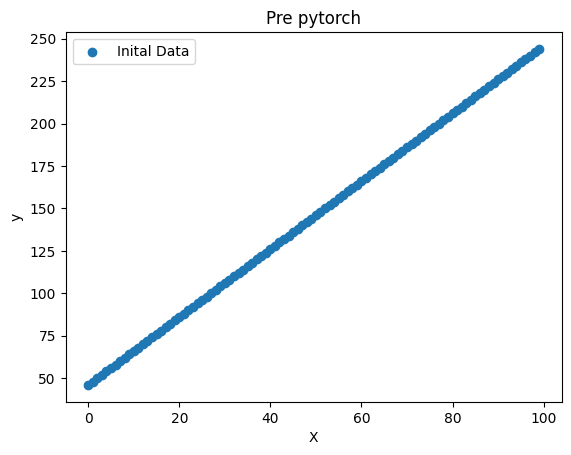

In [27]:
plt.scatter(X,y,label = 'Inital Data')
plt.title('Pre pytorch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [34]:
# We should normalize the data:
x_mean, x_std = X.mean(), X.std()
X_normalized = (X-x_mean)/x_std
X_tensor = torch.tensor(X_normalized,dtype=torch.float32)
print(X_tensor.shape)

torch.Size([100, 1])


In [35]:
y_mean, y_std = y.mean(), y.std()
y_normalized = (y-y_mean)/y_std
y_tensor = torch.tensor(y_normalized,dtype=torch.float32)
print(y_tensor.shape)

torch.Size([100])


In [37]:
class LinearRegressionModel(nn.Module): # Inherits nn.Module
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        return self.linear(x).squeeze(1) # squeeze(1) guarantees a 1 dimensional output.

In [38]:
in_features = 1
out_features = 1
model = LinearRegressionModel(in_features,out_features)

In [40]:
criterion = nn.MSELoss() # Mean-Square-Error for error formula.
optimizer = optim.SGD(model.parameters(), lr=0.1) 
# SGD: parameter = parameter - (learning rate * gradient)

In [48]:
num_epochs = 50 # Number of times we will run our model.

In [49]:
for epoch in range(num_epochs): # Standard formatting in pytorch

    # Forward pass:
    outputs = model(X_tensor)

    # Calculate loss:
    loss = criterion(outputs,y_tensor)

    # Backward pass and optimization:
    optimizer.zero_grad() # Clear gradient
    loss.backward() # Compute gradient
    optimizer.step() # Update weights.

    print(f'Epoch[{epoch + 1}/{num_epochs}], Loss: {loss.item():.2f}')

Epoch[1/50], Loss: 0.00
Epoch[2/50], Loss: 0.00
Epoch[3/50], Loss: 0.00
Epoch[4/50], Loss: 0.00
Epoch[5/50], Loss: 0.00
Epoch[6/50], Loss: 0.00
Epoch[7/50], Loss: 0.00
Epoch[8/50], Loss: 0.00
Epoch[9/50], Loss: 0.00
Epoch[10/50], Loss: 0.00
Epoch[11/50], Loss: 0.00
Epoch[12/50], Loss: 0.00
Epoch[13/50], Loss: 0.00
Epoch[14/50], Loss: 0.00
Epoch[15/50], Loss: 0.00
Epoch[16/50], Loss: 0.00
Epoch[17/50], Loss: 0.00
Epoch[18/50], Loss: 0.00
Epoch[19/50], Loss: 0.00
Epoch[20/50], Loss: 0.00
Epoch[21/50], Loss: 0.00
Epoch[22/50], Loss: 0.00
Epoch[23/50], Loss: 0.00
Epoch[24/50], Loss: 0.00
Epoch[25/50], Loss: 0.00
Epoch[26/50], Loss: 0.00
Epoch[27/50], Loss: 0.00
Epoch[28/50], Loss: 0.00
Epoch[29/50], Loss: 0.00
Epoch[30/50], Loss: 0.00
Epoch[31/50], Loss: 0.00
Epoch[32/50], Loss: 0.00
Epoch[33/50], Loss: 0.00
Epoch[34/50], Loss: 0.00
Epoch[35/50], Loss: 0.00
Epoch[36/50], Loss: 0.00
Epoch[37/50], Loss: 0.00
Epoch[38/50], Loss: 0.00
Epoch[39/50], Loss: 0.00
Epoch[40/50], Loss: 0.00
Epoch[41/

In [50]:
# I believe we are testing now?

new_x = 121

new_x_normalized = (new_x - x_mean)/ x_std

new_x_tensor = torch.tensor(new_x_normalized, dtype=torch.float32).view(1,-1) 

model.eval() # Put model into evaluation mode.
with torch.no_grad(): # We dont need gradient calculation. A LOT FASTER?
    prediction_normalized = model(new_x_tensor)

prediction_denormalized = prediction_normalized.item() * y_std + y_mean # Denormalizes data.    

print(f'predicted value for X = {new_x}: {prediction_denormalized}')

predicted value for X = 121: 287.9999920183898
